In [1]:
import my_finance_functions as mff 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sn

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Importo los datos

La lista "symbols" contiene los activos a analizar. Se genera un diccionario "data" que contiene un dataframe por cada simbolo que se carga. Cada dataframe tiene la información de máximo, mínimo, apertura, cierre y volumen para el timeframe y el rango de fechas que se elija.

In [2]:
symbols = ['GGAL.BA', 'BBAR.BA', 'YPFD.BA', 'BMA.BA', 'BYMA.BA', 'PAMP.BA',
           'SUPV.BA', 'CEPU.BA', 'TGSU2.BA', 'TXAR.BA', 'CRES.BA', 'VALO.BA', 'TECO2.BA',
           'TGNO4.BA', 'COME.BA']

data = {}
dic = {}

desde = '2020-05-04'
hasta = '2020-05-08'
interval = '5m'

for s in symbols:
    r = mff.get_intday(s, desde, hasta, interval)
    data[s] = mff.get_ohlc_dataframe(r)
    dic[s] = mff.get_close(r)

In [4]:
data['GGAL.BA'].to_csv('GGAL-2-May.csv')

## Correlación

Cuanto mayor sea la correlación entre dos activos, menos convenientes será operarlos simultaneamente. Para minimizar el riesgo y maximizar el beneficio deben tomarse activos lo más descorrelacionados posible.

El diccionario "dic" contiene los precios de cierre para cada activo. Se utiliza para crear el dataframe con el que se calcula la matriz de correlación.

In [47]:
df = pd.DataFrame(dic, columns = symbols)
correlation_matrix = df.corr()
correlation_matrix

,GGAL.BA,BBAR.BA,YPFD.BA,BMA.BA,BYMA.BA,PAMP.BA,SUPV.BA,CEPU.BA,TGSU2.BA,TXAR.BA,CRES.BA,VALO.BA,TECO2.BA,TGNO4.BA,COME.BA
GGAL.BA,1.000000,0.992502,0.933877,0.993207,0.952801,0.938242,0.988228,0.944167,0.955993,0.861525,0.820530,0.943686,0.932293,0.735712,0.829885
BBAR.BA,0.992502,1.000000,0.932164,0.992715,0.953648,0.923489,0.989591,0.949354,0.967890,0.851427,0.844021,0.940010,0.924830,0.721466,0.819626
YPFD.BA,0.933877,0.932164,1.000000,0.921861,0.927434,0.935344,0.936749,0.933144,0.922005,0.881339,0.807530,0.942835,0.884306,0.771963,0.868702
BMA.BA,0.993207,0.992715,0.921861,1.000000,0.946357,0.920798,0.987837,0.936139,0.963350,0.843932,0.829988,0.935095,0.937583,0.701590,0.802048
BYMA.BA,0.952801,0.953648,0.927434,0.946357,1.000000,0.930111,0.958199,0.947827,0.960198,0.886287,0.804061,0.945152,0.932411,0.781252,0.855516
PAMP.BA,0.938242,0.923489,0.935344,0.920798,0.930111,1.000000,0.920334,0.900287,0.899029,0.935403,0.764047,0.964712,0.898636,0.879883,0.936625
SUPV.BA,0.988228,0.989591,0.936749,0.987837,0.958199,0.920334,1.000000,0.947822,0.964478,0.858464,0.848591,0.938087,0.932751,0.718558,0.813708
CEPU.BA,0.944167,0.949354,0.933144,0.936139,0.947827,0.900287,0.947822,1.000000,0.936483,0.857173,0.779518,0.929014,0.872659,0.782099,0.850281
TGSU2.BA,0.955993,0.967890,0.922005,0.963350,0.960198,0.899029,0.964478,0.936483,1.000000,0.829589,0.855136,0.917444,0.931196,0.683260,0.782243
TXAR.BA,0.861525,0.851427,0.881339,0.843932,0.886287,0.935403,0.858464,0.857173,0.829589,1.000000,0.667860,0.940570,0.860117,0.881481,0.923028


Grafico el heatmap para detectar el par de activos con menor correlación.

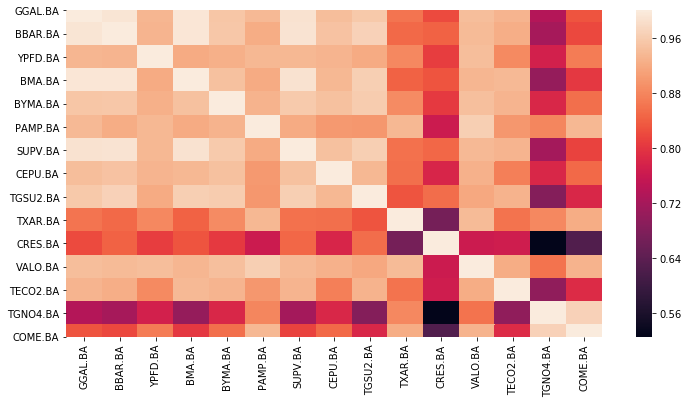

In [44]:
fig = plt.figure(figsize = (12, 6))
sn.heatmap(correlation_matrix)

## Máximas correlaciónes

Banco Galicia y Banco Francés:

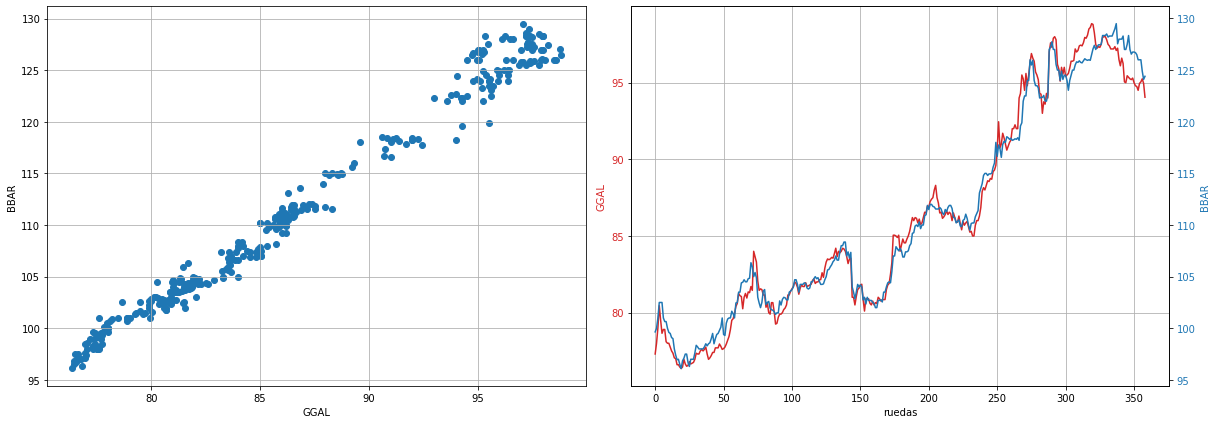

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))
ax1.scatter(df['GGAL.BA'], df['BBAR.BA'])
ax1.set_xlabel('GGAL')
ax1.set_ylabel('BBAR')
ax1.grid()

color = 'tab:red'
ax2.set_xlabel('ruedas')
ax2.plot(dic['GGAL.BA'], color=color)
ax2.set_ylabel('GGAL', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax3 = ax2.twinx()
color = 'tab:blue'
ax3.plot(dic['BBAR.BA'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylabel('BBAR', color=color)

fig.tight_layout()

ax2.grid()

Banco Galicia y Banco Macro:

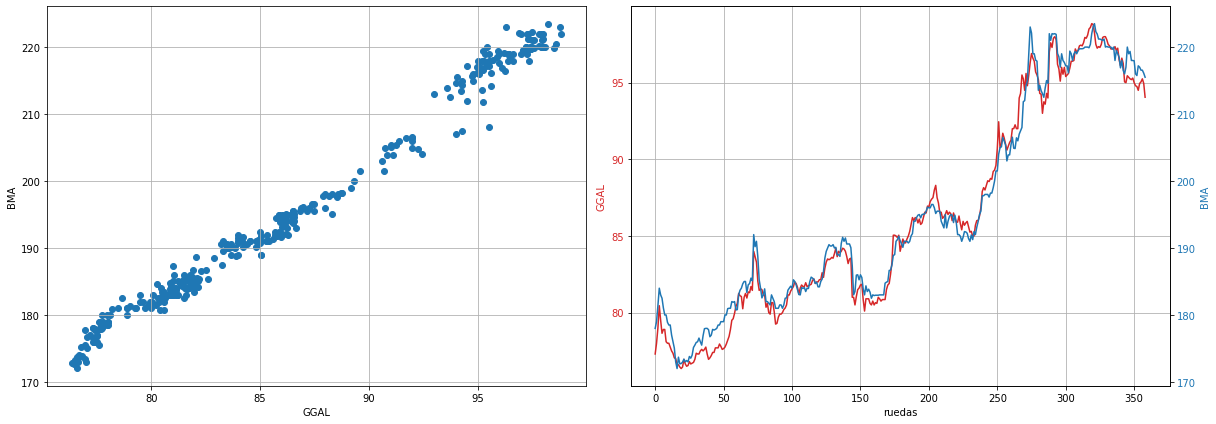

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))
ax1.scatter(df['GGAL.BA'], df['BMA.BA'])
ax1.set_xlabel('GGAL')
ax1.set_ylabel('BMA')
ax1.grid()

color = 'tab:red'
ax2.set_xlabel('ruedas')
ax2.plot(dic['GGAL.BA'], color=color)
ax2.set_ylabel('GGAL', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax3 = ax2.twinx()
color = 'tab:blue'
ax3.plot(dic['BMA.BA'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylabel('BMA', color=color)

fig.tight_layout()

ax2.grid()

## Minimas correlaciones
Transportadora de Gas Norte y Cresud:

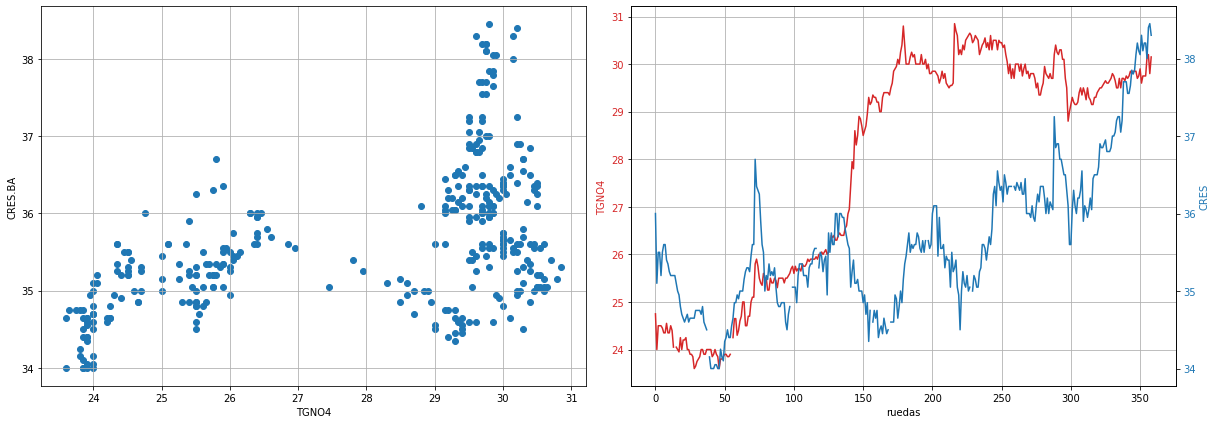

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))
ax1.scatter(df['TGNO4.BA'], df['CRES.BA'])
ax1.set_xlabel('TGNO4')
ax1.set_ylabel('CRES.BA')
ax1.grid()

color = 'tab:red'
ax2.set_xlabel('ruedas')
ax2.plot(dic['TGNO4.BA'], color=color)
ax2.set_ylabel('TGNO4', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax3 = ax2.twinx()
color = 'tab:blue'
ax3.plot(dic['CRES.BA'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylabel('CRES', color=color)

fig.tight_layout()

ax2.grid()

Deberia operarse TGNO4 y CRES.